In [365]:
import pandas as pd
import numpy as np
year = "all"
if year == "all":
    dpost = pd.read_pickle(f'datasets/filtered_posts.pickle')
    dcomment = pd.concat([pd.read_pickle(f'datasets/stances/{year}/Tier_1.pickle') for year in range(2016, 2019)])
else:
    dpost = pd.read_pickle(f'datasets/Posts-{year}.pickle')
    dcomment = pd.read_pickle(f'datasets/stances/{year}/Tier_1.pickle')

stance_map = {']favor': 1, 
              ']against': -1, 
              ']none': 0}

dcomment['stance'] = dcomment['stance'].map(stance_map)
dcomment.dropna(subset=['stance'], inplace=True)
dpost



,link_id,post_auth,post_y,YMD,post_ym,post_utc,num_coms,score,post_body,domain,sub,bias,cred,post_embd,Fine_Embed
1,3yywqp,Stewpid,2016,2016-01-01,2016-01,1451607501,21,14,Clinton emails: Billionaire Soros said he regr...,thehill.com,politics,-0.088,0.867,"[0.012420128, -0.0026544628, -0.029519917, -0....","[0.004177152644842863, -0.029693076387047768, ..."
8,3yz5hs,jcm267,2016,2016-01-01,2016-01,1451612659,33,0,Donald Trump Is Smart To Remind Voters Of Clin...,thefederalist.com,politics,0.675,0.385,"[-0.041005284, -0.08121881, -0.009774345, -0.0...","[0.004384548403322697, -0.048331696540117264, ..."
23,3yzyxp,yaschobob,2016,2016-01-01,2016-01,1451633325,10,62,Jeb Bush Confuses Tamir Rice Case With Chicago...,talkingpointsmemo.com,politics,-0.344,0.784,"[-0.014475002, -0.071005836, -0.022961259, 0.0...","[-0.004660650622099638, -0.03276393935084343, ..."
38,3z0q5j,y2quest,2016,2016-01-01,2016-01,1451658270,148,76,Democrats are now in real danger of becoming e...,washingtonpost.com,politics,-0.331,0.796,"[-0.035939854, -0.045483213, -0.012696436, 0.0...","[-0.009360936470329762, -0.04726952314376831, ..."
59,3z1go7,OrichalcosDartz,2016,2016-01-01,2016-01,1451672481,21,0,Hiking Minimum Wage an Inefficient Tool to Fig...,nbcnews.com,politics,-0.338,0.889,"[0.006918547, -0.008701404, 0.0061696493, -0.0...","[0.006528250407427549, -0.027908029034733772, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532479,aaqp33,orthonormal_orthodox,2018,2018-12-30,2018-12,1546128896,11,1,5 Republicans who could challenge Trump in 2020,theweek.com,Republican,-0.538,0.558,"[-0.044199515, -0.059550088, -0.009102394, -0....","[0.005191682372242212, -0.02018759585916996, 0..."
532480,aaw16k,LandSurf88,2018,2018-12-30,2018-12,1546178010,66,493,Valid point!,nypost.com,Republican,0.402,0.625,"[-0.010708254, 0.004500033, 0.016396742, -0.03...","[-0.003179989755153656, -0.042684830725193024,..."
532481,ab2q12,[deleted],2018,2018-12-31,2018-12,1546223437,19,7,China will surpass US to be world's largest ec...,foxnews.com,Republican,0.480,0.590,"[-0.004215387, -0.0429633, 0.018388942, -0.006...","[0.006213434971868992, -0.05457596108317375, 0..."
532483,ab86sh,DEYoungRepublicans,2018,2018-12-31,2018-12,1546271038,2,11,Antifa Agitator Tied to Top Democrats; Questio...,thenewamerican.com,Republican,0.680,0.249,"[-0.024949003, -0.060494687, -0.015147206, -0....","[0.006383430678397417, -0.014728380367159843, ..."


In [366]:
dpost[(dpost['post_y']==2016) & (dpost['sub']=='democrats')].count()

link_id       2398
post_auth     2398
post_y        2398
YMD           2398
post_ym       2398
post_utc      2398
num_coms      2398
score         2398
post_body     2398
domain        2398
sub           2398
bias          2398
cred          2398
post_embd     2398
Fine_Embed    2398
dtype: int64

In [98]:
dcomment[(dcomment['com_y']==2016) & (dcomment['sub']=='Conservative')].count()

com_idx      23569
com_id       23569
com_auth     23569
com_utc      23569
post id      23569
link_id      23569
com_body     23569
com_y        23569
com_ym       23569
sub          23569
sub_id       23569
bias         23569
cred         23569
post_body    23569
stance       23569
dtype: int64

In [367]:
dpost = dpost.rename(columns={"id": "link_id", 
                         "author": "post_auth", 
                         "created_utc": "post_utc", 
                         "num_comments": "num_coms", 
                         "score": "score", 
                         "domain": "domain", 
                         "title": "post_body", 
                         "Y": "post_y",
                         "YM": "post_ym", 
                         "sub" : "sub",  
                         "Bias" : "bias", 
                         "Cred": "cred", 
                         "embd":"post_embd"}, errors="ignore")
dcomment = dcomment.rename(columns={"Index": "com_idx", 
                         "id": "com_id", 
                         "author": "com_auth", 
                         "created_utc": "com_utc", 
                         "parent_id": "post id", 
                         "link_id": "link_id", 
                         "body": "com_body", 
                         "Y": "com_y", 
                         "YM": "com_ym", 
                         "sub" : "sub", 
                         "subreddit_id" : "sub_id", 
                         "Bias" : "bias", 
                         "Cred": "cred", 
                         "submission_body":"post_body", 
                         "stance":"stance"}, errors="ignore")

dcomment

,com_idx,com_id,com_auth,com_utc,post id,link_id,com_body,com_y,com_ym,sub,sub_id,bias,cred,post_body,stance
948718,948718,cyi64u7,ultimis,1451638295,t3_3yz5f1,3yz5f1,I read recently on this subject that in politi...,2016,2016-01,Conservative,t5_2qh6p,0.675,0.385,Donald Trump Is Smart To Remind Voters Of Clin...,1.0
948775,948775,cyiau4n,MiyegomboBayartsogt,1451660278,t3_3yzt2a,3yzt2a,"Seemingly without effort, Donald Trump's presi...",2016,2016-01,Conservative,t5_2qh6p,0.468,0.504,Black Power Extremist Louis Farrakhan Warns Hi...,1.0
948826,948826,cyigkcw,VirginWizard69,1451673375,t3_3z0z09,3z0z09,I loves me some Whittle. \n\n,2016,2016-01,Conservative,t5_2qh6p,0.706,0.294,WATCH: Bill Whittle’s last monologue of the ye...,1.0
948859,948859,cyik9i9,RPDBF,1451679904,t3_3z1gr7,3z1gr7,Well at least he moved on from Its because the...,2016,2016-01,Conservative,t5_2qh6p,-0.177,0.915,Chris Christie loses his marbles,1.0
948863,948863,cyikofp,caprimulgidae,1451680644,t3_3z0cfe,3z0cfe,And for months pundits like Krauthammer have b...,2016,2016-01,Conservative,t5_2qh6p,0.504,0.588,Krauthammer's Take: Trump Promising 'Success W...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393914,393914,ecug0w8,Tampammm,1546137593,t3_aaqp33,aaqp33,Kasich was a crybaby sore loser 2 years ago. ...,2018,2018-12,Republican,NaN,-0.538,0.558,5 Republicans who could challenge Trump in 2020,-1.0
393942,393942,ecvfrgx,jackgoffigen,1546179704,t3_aaw16k,aaw16k,The main stream media is witholding the inform...,2018,2018-12,Republican,NaN,0.402,0.625,Valid point!,1.0
394124,394124,ecyhd8x,gorthaur1,1546279007,t3_ab2q12,ab2q12,"I don't think there is any way, long term, to ...",2018,2018-12,Republican,NaN,0.480,0.590,China will surpass US to be world's largest ec...,1.0
394152,394152,ecyuu4y,RedBaronsBrother,1546288593,t3_ab86sh,ab86sh,Its interesting how many Democratic politician...,2018,2018-12,Republican,NaN,0.680,0.249,Antifa Agitator Tied to Top Democrats; Questio...,1.0


In [368]:
dcomment[dcomment['post_body'].str.contains('China will surpass US to be wor', case=False)]['post_body'].iloc[0]

"China will surpass US to be world's largest economy — it's time for us to shift gears"

In [369]:
import torch
import numpy as np
from scipy.linalg import eigh
import os

model_path = 'models/negation_mat_20240102_182223_31'
# Load the PyTorch model
model = torch.load(model_path, map_location=torch.device('cpu'))

# Get the weights of the linear layer
# Convert the linear layer to a numpy matrix
weights = model['linear.weight'].numpy()
bias = model['linear.bias'].numpy()

def get_negation(embedding, stance):
    if stance == -1:
        return np.matmul(embedding, weights) + bias
    elif stance == 1:
        return embedding
    else:
        return np.zeros(len(embedding))

In [370]:
dcomment = dcomment[~dcomment.index.duplicated()]
dcomment['post_embd'] = dcomment['link_id'].map(dpost.set_index('link_id')['post_embd']).dropna().map(np.array)
dcomment.dropna(subset=['post_embd'], inplace=True)
dcomment['com_embd'] = dcomment.apply(lambda x: get_negation(x['post_embd'], x['stance']), axis=1).dropna().map(np.array)
dcomment.loc[dcomment['stance'] == -1]

dcomment['com_cred'] = 0.5 + dcomment['stance'] * (dcomment['link_id'].map(dpost.set_index('link_id')['cred']).dropna() - 0.5)
dcomment['com_bias'] = dcomment['stance'] * dcomment['link_id'].map(dpost.set_index('link_id')['bias']).dropna()

dcomment['com_embd']

duser = dcomment.groupby('com_auth').agg({'com_embd': 'mean', 'com_cred':'mean', 'com_bias':'mean', 'stance': 'mean', 'com_idx': 'count'}).reset_index()
duser = duser.rename(columns={"com_idx": "com_count"}, errors="raise")
duser

/var/folders/9v/c8b1mw1n6_1_7jz4v20_k62h0000gq/T/ipykernel_40583/2867121842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcomment['post_embd'] = dcomment['link_id'].map(dpost.set_index('link_id')['post_embd']).dropna().map(np.array)
/var/folders/9v/c8b1mw1n6_1_7jz4v20_k62h0000gq/T/ipykernel_40583/2867121842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcomment.dropna(subset=['post_embd'], inplace=True)
/var/folders/9v/c8b1mw1n6_1_7jz4v20_k62h0000gq/T/ipykernel_40583/2867121842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,com_auth,com_embd,com_cred,com_bias,stance,com_count
0,-BlackBoxBeing-,"[-0.007453887537121773, -0.03637790330685675, ...",0.524,0.084,0.400,10
1,-Horatio_Alger_Jr-,"[0.00396598522167872, -0.03582302031709867, -0...",0.556,0.207,0.588,17
2,-R-TRAIN-,"[-0.014554946, -0.032226495, -0.004797897, -0....",0.556,0.133,0.692,13
3,-RagnarDanneskjold-,"[-0.0025753604592934536, -0.023503142387534565...",0.563,0.267,0.785,65
4,-Shank-,"[-0.0016571821, -0.030269237, -0.005705531, -0...",0.539,0.103,0.562,32
...,...,...,...,...,...,...
3150,zroxx2,"[-0.00518606482283008, -0.03441776888263248, -...",0.559,0.283,0.846,285
3151,zuckfan,"[-0.0051626205, -0.020039234, -0.0036787621, -...",0.662,0.093,0.875,16
3152,zugi,"[0.0053292485, 0.006973243, 0.016654374, -0.00...",0.838,-0.158,1.000,5
3153,zummit,"[0.003704511, -0.022934966, 7.104313e-05, -0.0...",0.533,0.121,0.429,21


In [ ]:
# dcomment['com_embd'] = dcomment['stance'] * dcomment['link_id'].map(dpost.set_index('link_id')['post_embd']).dropna().map(np.array)
# dcomment['com_cred'] = dcomment['stance'] * dcomment['link_id'].map(dpost.set_index('link_id')['cred']).dropna()
# dcomment['com_bias'] = dcomment['stance'] * dcomment['link_id'].map(dpost.set_index('link_id')['bias']).dropna()
# dcomment.dropna(subset=['com_embd'], inplace=True)
# #dcomment.loc[dcomment['stance'] == 0]
# duser = dcomment.groupby('com_auth').agg({'com_embd': 'mean', 'com_cred':'mean', 'com_bias':'mean', 'stance': 'mean', 'com_idx': 'count'}).reset_index()
# duser = duser.rename(columns={"com_idx": "com_count"}, errors="raise")
# duser

In [371]:
from umap import umap_ as UMAP
from sklearn.preprocessing import StandardScaler

reducer = UMAP.UMAP()

# Convert the 'com_embd' column to a 2D numpy array
X = np.stack(duser['com_embd'].values)

Xs = StandardScaler().fit_transform(X)
embedding = reducer.fit_transform(Xs)
embedding.shape
duser['umap'] = list(embedding)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [373]:
from __future__ import print_function
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
import pyximport
pyximport.install(setup_args={"script_args" : ["--verbose"]})
from evrot import evrot
"""
modified from https://github.com/kgori/scluster
Implements the self-tuning by roation of eigenvectors algorithm of Zelnik-Manor, Lihi, and Pietro Perona. 2004.
"Self-Tuning Spectral Clustering." In Advances in Neural Information Processing Systems, 1601-8.
"""
import numpy as np
from evrot import evrot

class Result(object):

    def __init__(self, assignments, memberships, number, scores):
        self.assignments = assignments
        self.memberships = memberships
        self.number = number
        self.vectors = scores

    def __str__(self):
        return ("Found {} clusters:\n"
                "Cluster assignments:\n\t{}\n"
                "Cluster memberships:\n\t{}".format(self.number,
                                                    self.assignments,
                                                    [a.tolist() for a in self.memberships]))

def order(l):
    """
    This function preserves the group membership,
    but sorts the labelling into numerical order
    """
    from collections import defaultdict

    list_length = len(l)

    d = defaultdict(list)
    for (i, element) in enumerate(l):
        d[element].append(i)

    l2 = [None] * list_length

    for (name, index_list) in enumerate(sorted(d.values(), key=min),
                                        start=1):
        for index in index_list:
            l2[index] = name

    return tuple(l2)


def cluster_rotate(A, group_num=None, method=None):
    """
    cluster by rotating eigenvectors to align with the canonical coordinate
    system

    :param A: Affinity matrix
    :param group_num: an array of group numbers to test
                      it is assumed to be a continuous set
    :param method:    method - 1   gradient descent
                   2   approximate gradient descent
    :return: clusts - a cell array of the results for each group number
             best_group_index - the group number index with best alignment quality
             Quality = the final quality for all tested group numbers
             Vr = the rotated eigenvectors
    """
    if group_num is None:
        group_num = [2,3,4,5,6]

    if method is None:
        method = 1  # change to any other value to estimate gradient numerically

    group_num = [x for x in sorted(group_num) if not x == 1]

    nclusts = max(group_num)

    L = csgraph.laplacian(affinity, normed=True, symmetrized=True)
    evals, V = eigh(L)

    # Rotate eigenvectors
    Vr = [None] * len(group_num)  # List holding best rotated eigenvectors for each iteration
    Vbuffer = np.zeros_like(V)  # Buffer holding rotated eigenvectors (changes each iteration)
    Vbuffer[:, :group_num[0] - 1] = V[:, :group_num[0] - 1]
    # rotated = [None] * len(group_num)
    clusts = [None] * len(group_num)
    quality = np.zeros(len(group_num))

    # for g in range(len(group_num)):
    for i, g in enumerate(group_num):
        print ("Testing {} clusters...".format(group_num[i]))
        Vcurr = Vbuffer[:, :g]
        Vcurr[:, g - 1] = V[:, g - 1]
        clusts[i], quality[i], Vbuffer[:, :g] = evrot(Vcurr, method)
        Vr[i] = Vbuffer[:, :g].copy()

    i = np.where(quality.max() - quality < 0.0001)[0]
    best_group_index = i[-1]

    return clusts, best_group_index, quality, Vr

In [451]:
from sklearn.cluster import SpectralClustering
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh

K = 7
normal_duser = duser.copy()
X = np.stack(duser['com_embd'].values)
X = X / np.linalg.norm(X,axis=1)[:,None]

dists = pdist(X, metric='cosine')
dists = squareform(dists)
knn_dists = np.sort(dists, axis=0)[K]
knn_dists = knn_dists[np.newaxis,:].T

loc_scale = knn_dists.dot(knn_dists.T)

affinity = np.exp(-dists**2 / loc_scale)
test_num=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
clusts, best_group_index, quality, Vr = cluster_rotate(affinity, group_num=test_num)

# L = csgraph.laplacian(affinity, normed=True, symmetrized=True)

# eival, eivec = eigsh(L, k=20)
# eival = eival[::-1] / np.max(eival)

# plt.plot(eival, '-o')


clustering = SpectralClustering(n_clusters=13, assign_labels="discretize", random_state=0, affinity='precomputed')
labels = clustering.fit_predict(affinity)

# # # Instantiate the Spectral Clustering model
# # clustering = SpectralClustering(n_clusters=6, assign_labels="discretize", random_state=0)

# # # Fit and predict
# # labels = clustering.fit_predict(X)

# # # Add the cluster labels to the dataframe
duser['cluster'] = labels


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


11


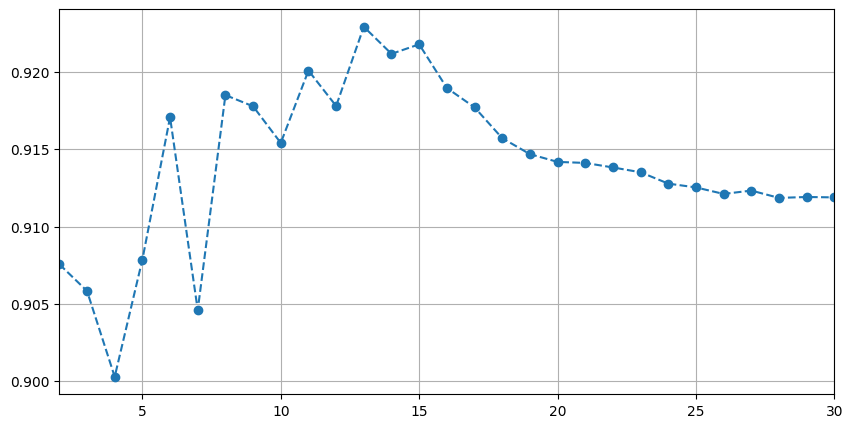

In [452]:
print(best_group_index)
plt.figure(figsize=(10,5))
plt.tight_layout()
plt.xlim([2,30])
plt.plot(test_num, quality, '--o')

plt.grid()
plt.savefig('quality.svg')

In [284]:
# from sklearn.cluster import SpectralClustering


# # Instantiate the Spectral Clustering model
# clustering = SpectralClustering(n_clusters=9, assign_labels="discretize", random_state=0)

# # Fit and predict
# labels = clustering.fit_predict(X)

# # Add the cluster labels to the dataframe
# duser['cluster'] = labels

In [453]:
clust_covs = []
clust_sizes = []

for clust in range(13):
    x = np.array(duser[duser['cluster'] == clust]['com_embd'].tolist())
    # Calculate the row covariance of x
    cov_x = np.cov(x, rowvar=False)
    # Calculate the eigenvalues of the covariance matrix
    eigvals = np.linalg.eigvals(cov_x)
    # Find the maximum eigenvalue
    max_eigval = np.max(abs(eigvals))
    clust_covs.append(max_eigval)
    clust_sizes.append(len(x))
    print(f'Cluster {clust} has {len(x)} users and a max eigenvalue of {max_eigval}')

sorted_idx = np.argsort(clust_covs)
sorted_idx
duser['cluster'] = duser['cluster'].map(dict(zip(sorted_idx, range(13))))
# duser['cluster'] = duser['cluster'].map(clust_covs)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Cluster 0 has 308 users and a max eigenvalue of 0.007204820369968286
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Cluster 1 has 168 users and a max eigenvalue of 0.004019875468669236
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Cluster 2 has 674 users and a max eigenvalue of 0.003589720804730848
Intel MKL WARNING: Support of Intel(R) Stre

In [488]:
np.sqrt(clust_covs)

array([0.08488121, 0.06340249, 0.05991428, 0.03982475, 0.06652978,
       0.0827696 , 0.05083097, 0.03667131, 0.07066427, 0.05102904,
       0.07036841, 0.09987456, 0.08046701])

In [489]:
custom_palette = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#bcbd22", "#17becf", "#2f2f2f", "#6f6f76", "#9f9f9f", "#bfbfbf"
]
# Set the palette in seaborn
sns.set_palette(custom_palette)

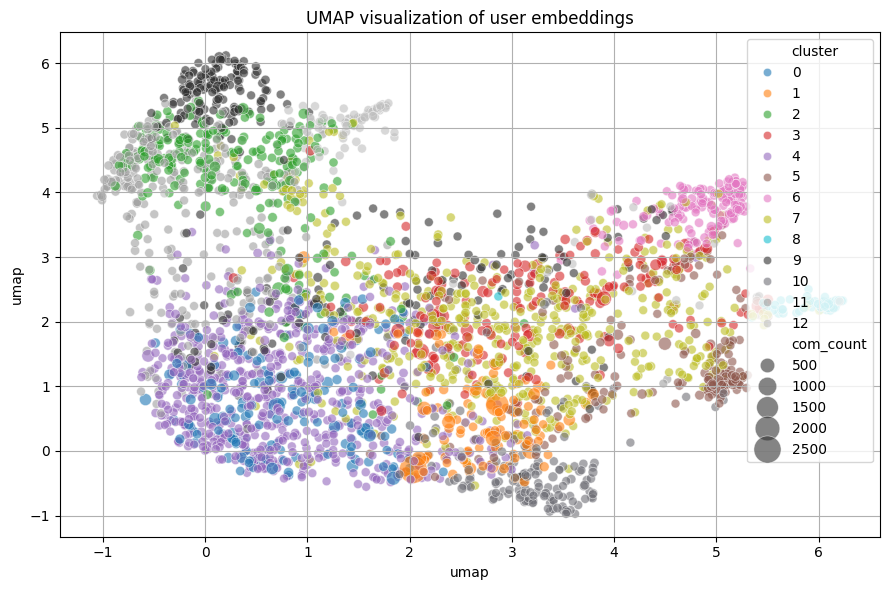

In [490]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

plt.figure(figsize=(9, 6))
plt.grid()
sns.scatterplot(x=duser['umap'].apply(lambda x: x[0]), y=duser['umap'].apply(lambda x: x[1]), hue=duser['cluster'], size=(duser['com_count']),sizes=(40, 400), palette=custom_palette, alpha=.6)
plt.title('UMAP visualization of user embeddings')

plt.tight_layout()
plt.savefig('umap.png', dpi=300)
plt.savefig('umap.svg')
plt.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


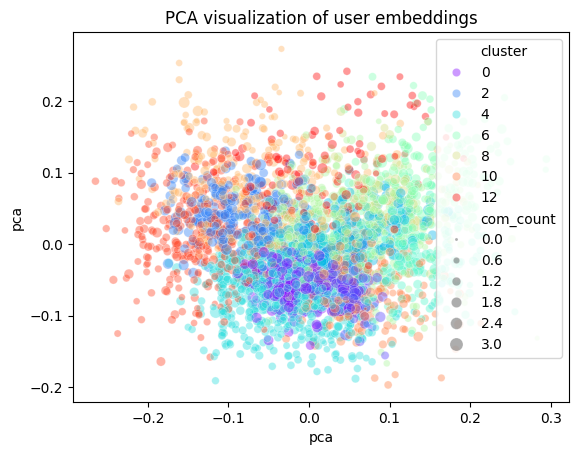

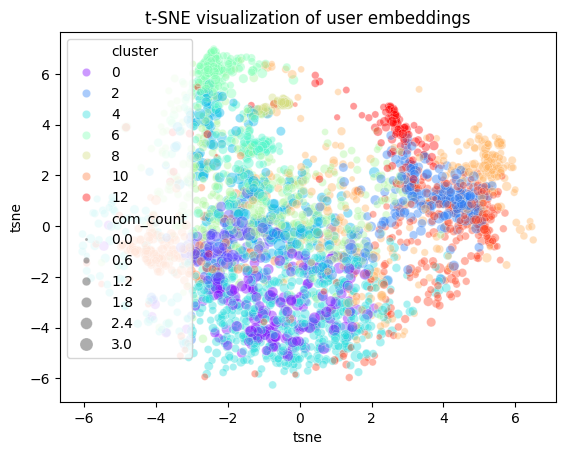

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Convert the 'com_embd' column to a 2D numpy array
X = np.stack(duser['com_embd'].values)

# Instantiate the dim_reduction models
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=0)

# Fit and transform
X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)

# Add the PCA representation to the dataframe
duser['pca'] = list(X_pca)
duser['tsne'] = list(X_tsne)

# # Visualize the PCA representation
sns.scatterplot(x=duser['pca'].apply(lambda x: x[0]), y=duser['pca'].apply(lambda x: x[1]), hue=duser['cluster'], size=np.log10(duser['com_count']),sizes=(5, 100), palette='rainbow', alpha=.4)
plt.title('PCA visualization of user embeddings')
plt.show()

# Visualize the t-SNE representation
sns.scatterplot(x=duser['tsne'].apply(lambda x: x[0]), y=duser['tsne'].apply(lambda x: x[1]), hue=duser['cluster'], size=np.log10(duser['com_count']),sizes=(5, 100), palette='rainbow', alpha=.4)
plt.title('t-SNE visualization of user embeddings')
plt.show()

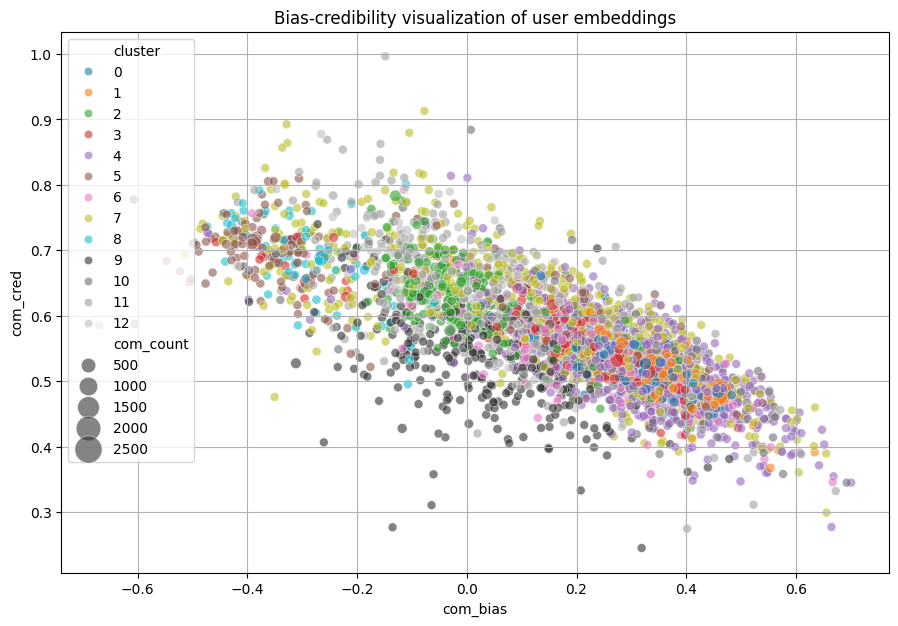

In [471]:
# # Visualize the Bias-credibility representation
plt.figure(figsize=(9, 6))
plt.grid()
plt.tight_layout()
sns.scatterplot(x=duser['com_bias'], y=duser['com_cred'], hue=duser['cluster'], size=(duser['com_count']),sizes=(40, 400), palette=custom_palette, alpha=.6)
plt.title('Bias-credibility visualization of user embeddings')
plt.savefig('bias_cred.svg')
plt.savefig('bias_cred.png', dpi=300)
plt.show()

<Figure size 400x400 with 0 Axes>

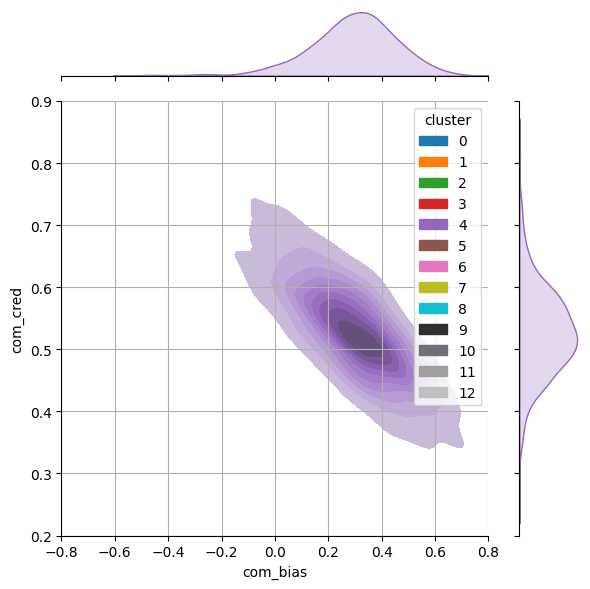

In [485]:
# Filter the dataframe for the cluster of interest
cnum = 4
clust = duser[duser['cluster'] == cnum]
plt.figure(figsize=(4, 4))
sns.jointplot(x=clust['com_bias'], y=clust['com_cred'], hue=duser['cluster'], palette=custom_palette, kind="kde", fill=True, alpha=1)
plt.xlim([-0.8, 0.8])
plt.ylim([0.2, 0.9])
plt.tight_layout()
plt.grid()
plt.savefig(f'bias_cred_{cnum}.svg')
plt.savefig(f'bias_cred_{cnum}.png', dpi=300)
plt.show()

In [475]:
duser['low_cred'] = duser['com_cred'] < 0.5
duser['high_bias'] = abs(duser['com_bias']) > 0.5

In [476]:
dclust = duser.groupby('cluster').agg({'com_bias': ['mean', 'std'], 'com_cred':['mean', 'std'], 'high_bias':['sum', 'count'], 'low_cred':['sum', 'count']}).reset_index()
dclust

cluster   com_bias        com_cred        high_bias       low_cred      
                 mean    std     mean    std       sum count      sum count
0        0  3.046e-01  0.076    0.526  0.033         0   164       30   164
1        1  3.308e-01  0.099    0.519  0.045         3   112       33   112
2        2  3.204e-02  0.138    0.614  0.063         1   232       10   232
3        3  1.970e-01  0.173    0.558  0.057         1   194       25   194
4        4  2.922e-01  0.164    0.528  0.071        54   674      234   674
5        5 -1.521e-01  0.297    0.655  0.078         6   168        8   168
6        6  1.980e-01  0.176    0.542  0.071         4   155       40   155
7        7  1.270e-01  0.257    0.601  0.098        29   520       83   520
8        8 -2.711e-01  0.116    0.680  0.065         0    61        1    61
9        9  2.148e-02  0.155    0.531  0.079         1   291       95   291
10      10  2.855e-01  0.220    0.532  0.078        14   169       58   169
11      11  5.501e-02  0.205    0.622  0.100        10   308       33   308
12      12 -8.105e-04  0.142    0.641  0.077         0   107        4   107

In [477]:
dclust['high_bias', 'ratio'] = dclust['high_bias']['sum'] / dclust['high_bias']['count']
dclust['low_cred', 'ratio'] = dclust['low_cred']['sum'] / dclust['low_cred']['count']
dclust

cluster   com_bias        com_cred        high_bias       low_cred        \
                 mean    std     mean    std       sum count      sum count   
0        0  3.046e-01  0.076    0.526  0.033         0   164       30   164   
1        1  3.308e-01  0.099    0.519  0.045         3   112       33   112   
2        2  3.204e-02  0.138    0.614  0.063         1   232       10   232   
3        3  1.970e-01  0.173    0.558  0.057         1   194       25   194   
4        4  2.922e-01  0.164    0.528  0.071        54   674      234   674   
5        5 -1.521e-01  0.297    0.655  0.078         6   168        8   168   
6        6  1.980e-01  0.176    0.542  0.071         4   155       40   155   
7        7  1.270e-01  0.257    0.601  0.098        29   520       83   520   
8        8 -2.711e-01  0.116    0.680  0.065         0    61        1    61   
9        9  2.148e-02  0.155    0.531  0.079         1   291       95   291   
10      10  2.855e-01  0.220    0.532  0.078        14   169       58   169   
11      11  5.501e-02  0.205    0.622  0.100        10   308       33   308   
12      12 -8.105e-04  0.142    0.641  0.077         0   107        4   107   

   high_bias low_cred  
       ratio    ratio  
0      0.000    0.183  
1      0.027    0.295  
2      0.004    0.043  
3      0.005    0.129  
4      0.080    0.347  
5      0.036    0.048  
6      0.026    0.258  
7      0.056    0.160  
8      0.000    0.016  
9      0.003    0.326  
10     0.083    0.343  
11     0.032    0.107  
12     0.000    0.037

In [479]:
pd.set_option('display.precision',3)
dclust

cluster   com_bias        com_cred        high_bias       low_cred        \
                 mean    std     mean    std       sum count      sum count   
0        0  3.046e-01  0.076    0.526  0.033         0   164       30   164   
1        1  3.308e-01  0.099    0.519  0.045         3   112       33   112   
2        2  3.204e-02  0.138    0.614  0.063         1   232       10   232   
3        3  1.970e-01  0.173    0.558  0.057         1   194       25   194   
4        4  2.922e-01  0.164    0.528  0.071        54   674      234   674   
5        5 -1.521e-01  0.297    0.655  0.078         6   168        8   168   
6        6  1.980e-01  0.176    0.542  0.071         4   155       40   155   
7        7  1.270e-01  0.257    0.601  0.098        29   520       83   520   
8        8 -2.711e-01  0.116    0.680  0.065         0    61        1    61   
9        9  2.148e-02  0.155    0.531  0.079         1   291       95   291   
10      10  2.855e-01  0.220    0.532  0.078        14   169       58   169   
11      11  5.501e-02  0.205    0.622  0.100        10   308       33   308   
12      12 -8.105e-04  0.142    0.641  0.077         0   107        4   107   

   high_bias low_cred  
       ratio    ratio  
0      0.000    0.183  
1      0.027    0.295  
2      0.004    0.043  
3      0.005    0.129  
4      0.080    0.347  
5      0.036    0.048  
6      0.026    0.258  
7      0.056    0.160  
8      0.000    0.016  
9      0.003    0.326  
10     0.083    0.343  
11     0.032    0.107  
12     0.000    0.037

In [483]:
print(dclust.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format,))

\begin{tabular}{rrrrrrrrrrr}
\toprule
cluster & \multicolumn{2}{r}{com_bias} & \multicolumn{2}{r}{com_cred} & \multicolumn{2}{r}{high_bias} & \multicolumn{2}{r}{low_cred} & high_bias & low_cred \\
 & mean & std & mean & std & sum & count & sum & count & ratio & ratio \\
\midrule
0 & 0.305 & 0.076 & 0.526 & 0.033 & 0 & 164 & 30 & 164 & 0.000 & 0.183 \\
1 & 0.331 & 0.099 & 0.519 & 0.045 & 3 & 112 & 33 & 112 & 0.027 & 0.295 \\
2 & 0.032 & 0.138 & 0.614 & 0.063 & 1 & 232 & 10 & 232 & 0.004 & 0.043 \\
3 & 0.197 & 0.173 & 0.558 & 0.057 & 1 & 194 & 25 & 194 & 0.005 & 0.129 \\
4 & 0.292 & 0.164 & 0.528 & 0.071 & 54 & 674 & 234 & 674 & 0.080 & 0.347 \\
5 & -0.152 & 0.297 & 0.655 & 0.078 & 6 & 168 & 8 & 168 & 0.036 & 0.048 \\
6 & 0.198 & 0.176 & 0.542 & 0.071 & 4 & 155 & 40 & 155 & 0.026 & 0.258 \\
7 & 0.127 & 0.257 & 0.601 & 0.098 & 29 & 520 & 83 & 520 & 0.056 & 0.160 \\
8 & -0.271 & 0.116 & 0.680 & 0.065 & 0 & 61 & 1 & 61 & 0.000 & 0.016 \\
9 & 0.021 & 0.155 & 0.531 & 0.079 & 1 & 291 & 95 & 29

In [494]:
duser['com_cred'].corr(duser['com_bias'])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


-0.7623987480841607

In [504]:
dcomment.loc[dcomment['com_auth'] == duser[duser['cluster'] == 5].sort_values('com_cred').iloc[0]['com_auth']]

,com_idx,com_id,com_auth,com_utc,post id,link_id,com_body,com_y,com_ym,sub,sub_id,bias,cred,post_body,stance,post_embd,com_embd,com_cred,com_bias
1994969,1994969,dnyjylc,ThereIsNoSpune,1507234454,t3_74f45d,74f45d,CNN = Fake News,2017,2017-10,Conservative,t5_2qh6p,0.791,0.224,Chris Cuomo Melts Down Live On Air: CNN 'Is No...,1.0,"[-0.011441217, -0.033598565, 0.055585083, -0.0...","[-0.011441217, -0.033598565, 0.055585083, -0.0...",0.224,0.791
1994975,1994975,dnyjzwj,ThereIsNoSpune,1507234490,t3_74gd4o,74gd4o,Good for Rubio!,2017,2017-10,Conservative,t5_2qh6p,0.746,0.317,Marco Rubio Wants the Army to Eject Pro-Commun...,1.0,"[-0.030679237, -0.10258745, 0.0038634045, 0.00...","[-0.030679237, -0.10258745, 0.0038634045, 0.00...",0.317,0.746
2007418,2007418,do9pccj,ThereIsNoSpune,1507822672,t3_75te3k,75te3k,"'Lost boys, we got em on the run!'",2017,2017-10,Conservative,t5_2qh6p,0.480,0.590,Liberal angst toward Feinstein threatens to di...,1.0,"[-0.031376947, -0.045540765, 0.0036959462, 0.0...","[-0.031376947, -0.045540765, 0.0036959462, 0.0...",0.590,0.480
2009692,2009692,dob7c1c,ThereIsNoSpune,1507899819,t3_763mp5,763mp5,She won’t be voted in again,2017,2017-10,Conservative,t5_2qh6p,0.468,0.504,The Missouri senator who hoped for Trump to be...,1.0,"[-0.010065054, -0.0687392, -0.02794167, -0.013...","[-0.010065054, -0.0687392, -0.02794167, -0.013...",0.504,0.468
2011483,2011483,docwx3y,ThereIsNoSpune,1507993400,t3_7660y2,7660y2,What an idiot,2017,2017-10,Conservative,t5_2qh6p,0.634,0.474,GMA Gushes Over Kimmel As He Trashes 'Idiot' T...,1.0,"[-0.049701933, -0.07108463, -0.027491262, -0.0...","[-0.049701933, -0.07108463, -0.027491262, -0.0...",0.474,0.634
2012826,2012826,doefji3,ThereIsNoSpune,1508081725,t3_76if36,76if36,The left wing news is slowly giving into trump...,2017,2017-10,Conservative,t5_2qh6p,0.402,0.625,“You can’t do that! That’s not how Barack Obam...,1.0,"[-0.056715965, 0.0044994215, -0.028007152, -0....","[-0.056715965, 0.0044994215, -0.028007152, -0....",0.625,0.402
2012886,2012886,doei7vo,ThereIsNoSpune,1508085191,t3_76j1t7,76j1t7,We truly are witnessing the complete and profo...,2017,2017-10,Conservative,t5_2qh6p,0.477,0.571,NBC's credibility collapse,1.0,"[0.0023154644, -0.03279703, 0.020120205, -0.04...","[0.0023154644, -0.03279703, 0.020120205, -0.04...",0.571,0.477
2013449,2013449,dof4zgl,ThereIsNoSpune,1508110518,t3_76libu,76libu,This dude will never be able to get another jo...,2017,2017-10,Conservative,t5_2qh6p,0.791,0.224,Colin Kaepernick Launches Legal Action Against...,1.0,"[0.026568428, -0.0020692486, -0.03597157, -0.0...","[0.026568428, -0.0020692486, -0.03597157, -0.0...",0.224,0.791
2019431,2019431,dokotb4,ThereIsNoSpune,1508386578,t3_77ahg6,77ahg6,The media wants SO desperately to convince vot...,2017,2017-10,Conservative,t5_2qh6p,0.634,0.474,Almost Half of Voters Believe Media Makes Up S...,1.0,"[-0.02368768, -0.08008837, -0.02622251, 0.0011...","[-0.02368768, -0.08008837, -0.02622251, 0.0011...",0.474,0.634
2021762,2021762,domff4i,ThereIsNoSpune,1508472066,t3_77idmx,77idmx,Dead soldiers are spinning in their graves rig...,2017,2017-10,Conservative,t5_2qh6p,0.791,0.224,Rep. Frederica Wilson Laughs Off Criticism by ...,1.0,"[0.012249509, -0.015630504, -0.025841445, -0.0...","[0.012249509, -0.015630504, -0.025841445, -0.0...",0.224,0.791


In [83]:

# Visualize the t-SNE representation
sns.scatterplot(x=f_duser['tsne'].apply(lambda x: x[0]), y=f_duser['tsne'].apply(lambda x: x[1]), hue=duser['cluster'], size=np.log10(duser['com_count']),sizes=(5, 100), palette='rainbow', alpha=.4)
plt.title('t-SNE visualization of user embeddings')
plt.show()

sns.scatterplot(x=f_duser['com_bias'], y=f_duser['com_cred'], hue=duser['cluster'], size=np.log10(duser['com_count']),sizes=(5, 100), palette='rainbow', alpha=.4)
plt.title('Bias-credibility visualization of user embeddings')
plt.show()

NameError: name 'f_duser' is not defined